# Машинное обучение, ФКН ВШЭ

## Практическое задание 1

### Общая информация
Дата выдачи: 18.09.2017  

Мягкий дедлайн: 23:59MSK 01.10.2017 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 08.10.2017  

### О задании

__Первая часть__ задания посвящена получению студентами навыков работы с библиотекой векторного вычисления numpy и библиотеками для построения графиков matplotlib/plotly. Это задание сдается частично в Яндекс.Контест (см. информацию ниже). В случае проблем с доступом к Яндекс.Контесту обращайтесь к своему семинаристу(ке).

__Вторая часть__ задания посвящена работе с данными: их преобразованию в нужный формат и устранению проблем в них.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-01-Username.ipynb, где Username — Ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-01-IvanovIvan.ipynb). Приложите модули с кодом functions.py и functions_vectorized.py и заархивируйте в zip формат. Имя архива должно быть homework-practice-01-Username.zip

Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).


Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** ...

## Часть 1

_Задачи позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Задачи 1-6
__(4.5 балла)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.25 балла__, векторизованная – в __0.5 балла__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py (см. шаблоны). Далее эти файлы необходимо сдать в Яндекс.Контест: https://official.contest.yandex.ru/contest/5016/problems/ в соответствующие задачи. По техническим причинам тестирование проводится на этапе компиляции, поэтому в случае любой ошибки вы будете получать вердикт CE, и в логе компиляции можно будет посмотреть, в чем проблема. Частичное выполнение задания (не все задачи) будет оцениваться, хотя и будет получать вердикт CE. Для удобства проверки приложите в ячейке ниже ссылки на самые успешные посылки.

__Замечание.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы) и корректные.

In [20]:
import numpy as np

In [21]:
import warnings
warnings.filterwarnings('ignore')

### __Задача 1__: 
Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [397]:
def prod_non_zero_diag(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Not vectorized implementation.
    """
    prod = 1 
    
    for i in range(min(len(x[0]), len(x))):
        if x[i][i] != 0:
            prod *= x[i][i]  
    
    return prod

In [401]:
#Test
x = [[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]
prod_non_zero_diag(x)

3

In [399]:
def prod_non_zero_diag_vect(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Vectorized implementation.
    """
    
    return x.diagonal()[x.diagonal() != 0].prod()

In [400]:
#Test
x = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
prod_non_zero_diag_vect(x)

3

### __Задача 2__: 
Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.

In [38]:
def are_multisets_equal(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Not vectorized implementation.
    """

    return set(x) == set(y)

In [41]:
#Test
x = [1, 2, 2, 4]
y = [4, 2, 1, 2]
are_multisets_equal(x, y)

True

In [59]:
def are_multisets_equal_vect(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Vectorized implementation.
    """

    return np.array_equal(np.unique(x), np.unique(y))

In [60]:
#Test
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])
are_multisets_equal_vect(x, y)

True

### __Задача 3__: 
Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [130]:
def max_after_zero(x):
    """Find max element after zero in array.
    

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Not vectorized implementation.
    """
    
    max = 0
    
    for i in range(1, len(x)):
        if(x[i - 1] == 0 & max < x[i]):
            max = x[i]
        
    return max

In [173]:
#Test
x = [6, 2, 0, 3, 0, 0, 5, 7, 0]
max_after_zero(x)

5

In [135]:
def max_after_zero_vect(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Vectorized implementation.
    """

    return (np.append(0, (x == 0)[:-1]).T * x).max()

In [133]:
#Test
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
max_after_zero_vect(x)

5

### __ Задача 4__:
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).

In [2]:
from skimage.io import imread, imshow

In [332]:
def convert_image(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Not vectorized implementation.
    """
    
    img_gray = [[0 for w in range(len(img[0]))] for h in range(len(img))]
    for w in range(len(img)):
        for h in range(len(img[0])):
            img_gray[w][h] = 1 / 3 * (
                  img[w][h][0] * coefs[0] / 255 
                + img[w][h][1] * coefs[1] / 255  
                + img[w][h][2] * coefs[2] / 255)
    
    return img_gray

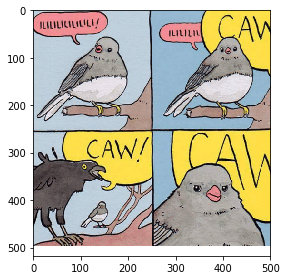

In [5]:
#Test
img = imread('../img/birds-meme.png') 
coefs = [0.299, 0.587, 0.114]
imshow(img)

Wall time: 3.5 s


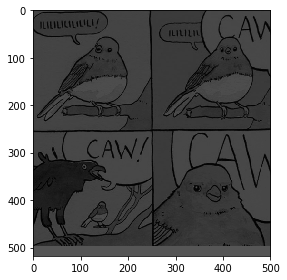

In [340]:
%%time
img_gray = convert_image(img, coefs)
imshow(np.array(img_gray))

In [341]:
def convert_image_vect(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Vectorized implementation.
    """
    
    return 1 / 3 * (img[:, :, 0] * coefs[0] / 255 + 
                    img[:, :, 1] * coefs[1] / 255 + 
                    img[:, :, 2] * coefs[2] / 255)

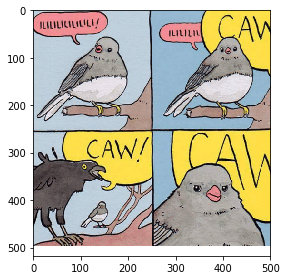

In [8]:
#Test
img = imread('../img/birds-meme.png') 
coefs = np.array([0.299, 0.587, 0.114])
imshow(img)

Wall time: 62 ms


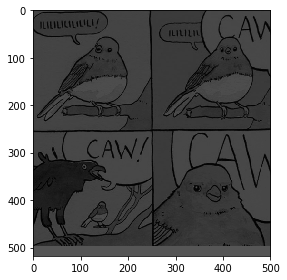

In [406]:
%%time
img_gray = convert_image_vect(img, coefs)
imshow(img_gray)

### __Задача 5__:
Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [380]:
def run_length_encoding(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Not vectorized implementation.
    """
    
    numbers, counts = [x[0]], [0]
    
    for i in range(len(x)):
        if (x[i] == numbers[-1]):
            counts[-1] += 1 
        else: 
            counts.append(1)
            numbers.append(x[i])
            
    return (numbers, counts)

In [381]:
#Test
x = [2, 2, 2, 3, 3, 3, 5]
run_length_encoding(x)

([2, 3, 5], [3, 3, 1])

In [388]:
def run_length_encoding_vect(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Vectorized implementation.
    """
    
    return np.unique(x, return_counts=True)

In [389]:
#Test
x = np.array([2, 2, 2, 3, 3, 3, 5])
run_length_encoding_vect(x)

(array([2, 3, 5]), array([3, 3, 1], dtype=int64))

### __Задача 6__:
Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [495]:
from scipy.spatial.distance import cdist

x = [[5, 6, 8], [2, 89, 12], [1, 0, 4]]
y = [[1, 23, 0], [1, 5, 5], [0, 3, 4], [2, 1, 9]]

In [496]:
%%time
cdist(x, y)

Wall time: 0 ns


array([[19.20937271,  5.09901951,  7.07106781,  5.91607978],
       [67.08949247, 84.29709366, 86.39444427, 88.05112151],
       [23.34523506,  5.09901951,  3.16227766,  5.19615242]])

In [497]:
def pairwise_distance(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Not vectorized implementation.
    """

    d = [[0 for j in range(len(y))] for i in range(len(x))]
    
    for i in range(len(x)):
        for j in range(len(y)):
            for k in range(len(x)):
                d[i][j] += (x[i][k] - y[j][k])**2
            d[i][j] = d[i][j]**(1/2)
    
    return d

In [498]:
#Test
x = [[5, 6, 8], [2, 89, 12], [1, 0, 4]]
y = [[1, 23, 0], [1, 5, 5], [0, 3, 4], [2, 1, 9]]

In [499]:
%%time
np.array(pairwise_distance(x, y))

Wall time: 0 ns


array([[19.20937271,  5.09901951,  7.07106781,  5.91607978],
       [67.08949247, 84.29709366, 86.39444427, 88.05112151],
       [23.34523506,  5.09901951,  3.16227766,  5.19615242]])

In [617]:
def pairwise_distance_vect(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Vctorized implementation.
    """

    return cdist(x, y)

In [247]:
#Test
#x = np.array([[5, 6, 8], [2, 89, 12], [1, 0, 4]])
#y = np.array([[1, 23, 0], [1, 5, 5], [0, 3, 4], [2, 1, 9]])

#np.linalg.norm(x)

# ????????????????????

### Задача 7
__(1.5 балла)__  
Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib или plotly постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

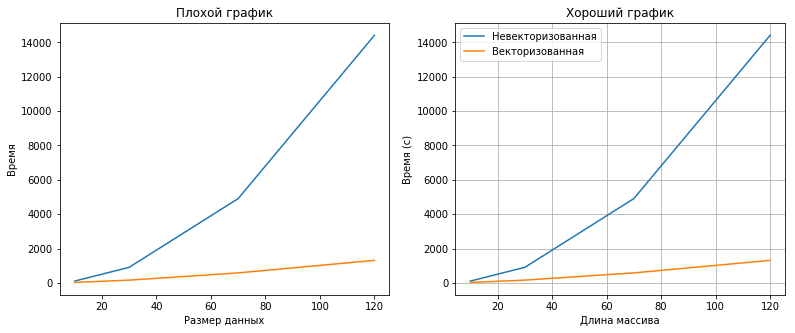

In [452]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

In [561]:
import time

In [562]:
def plot_time(data_size, time_vectorized, time_non_vectorized, title):
    f, ax = plt.subplots(1, 1, figsize=(13, 5))
    ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax.set_title(title)
    ax.set_xlabel(u"Длина массива")
    ax.set_ylabel(u"Время (с)")
    ax.grid()
    ax.legend()

#### График для Задачи 1

In [597]:
n = 50
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(150 * (i + 1), 100 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    prod_non_zero_diag(x)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    prod_non_zero_diag_vect(x)
    time_vectorized[i] = time.time() - start_time

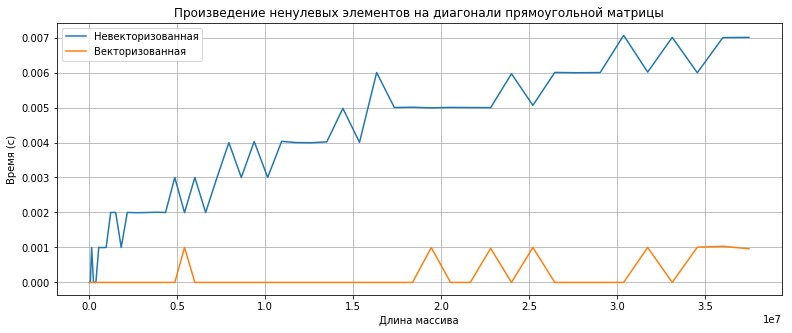

In [598]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Произведение ненулевых элементов на диагонали прямоугольной матрицы")

#### График для Задачи 2

In [576]:
n = 100
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(300 * (i + 1))
    y = np.random.rand(300 * (i + 1))
    data_size[i] = x.size 
    
    start_time = time.time()
    are_multisets_equal(x, y)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    are_multisets_equal_vect(x, y)
    time_vectorized[i] = time.time() - start_time

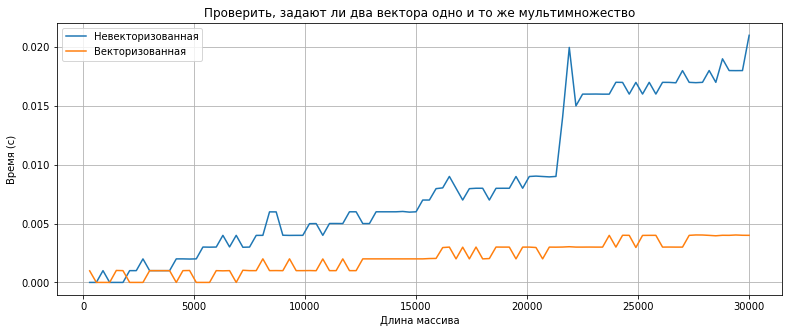

In [577]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Проверить, задают ли два вектора одно и то же мультимножество")

#### График для Задачи 3

In [586]:
n = 150
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(300 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    max_after_zero(x)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    max_after_zero_vect(x)
    time_vectorized[i] = time.time() - start_time

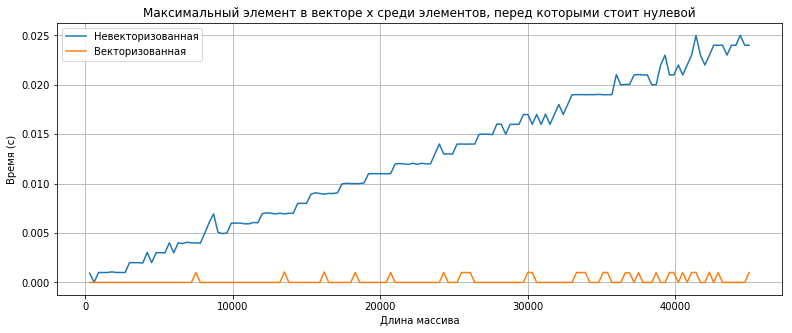

In [587]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой")

#### График для Задачи 4

In [607]:
n = 25
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

coefs = np.array([0.299, 0.587, 0.114])

for i in range(n):
    x = np.random.rand(30 * (i + 1), 20 * (i + 1), 3)
    data_size[i] = x.size
    
    start_time = time.time()
    convert_image(x, coefs)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    convert_image_vect(x, coefs)
    time_vectorized[i] = time.time() - start_time

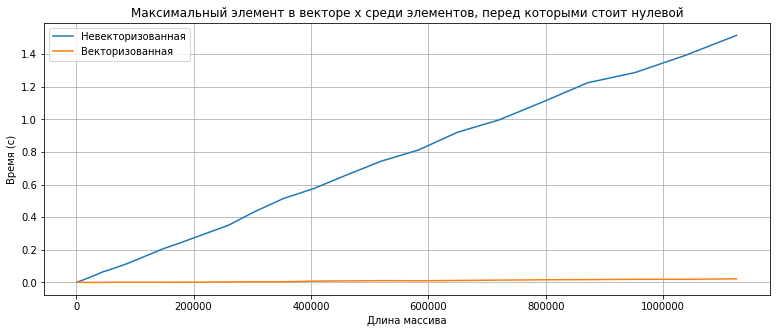

In [608]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Сложить каналы изображения с указанными весами")

#### График для Задачи 5

In [612]:
n = 150
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

coefs = np.array([0.299, 0.587, 0.114])

for i in range(n):
    x = np.random.rand(300 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    run_length_encoding(x)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    run_length_encoding_vect(x)
    time_vectorized[i] = time.time() - start_time

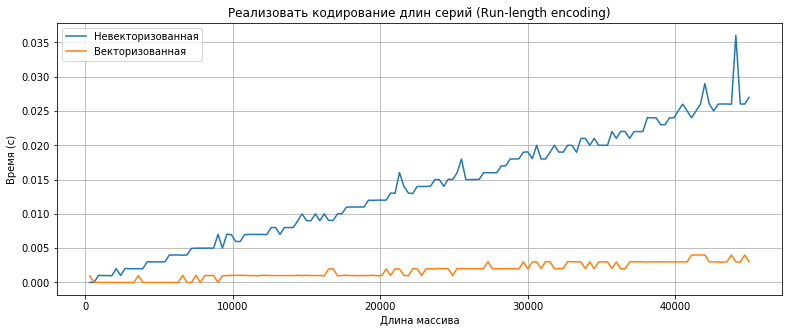

In [613]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Реализовать кодирование длин серий (Run-length encoding)")

#### График для Задачи 6

In [621]:
n = 10
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

coefs = np.array([0.299, 0.587, 0.114])

for i in range(n):
    x = np.random.rand(3 * (i + 1), 3 * (i + 1))
    y = np.random.rand(3 * (i + 1), 3 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    pairwise_distance(x, y)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    pairwise_distance_vect(x, y)
    time_vectorized[i] = time.time() - start_time

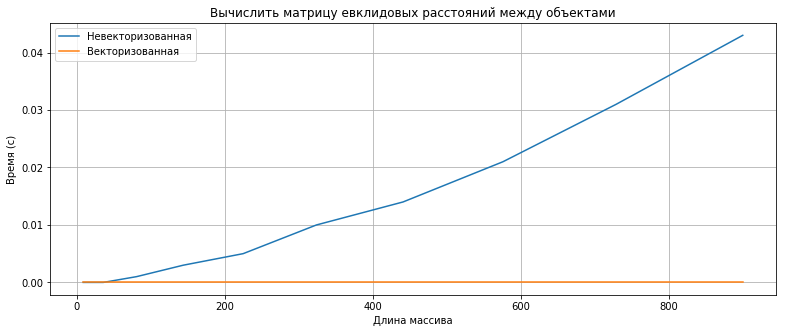

In [622]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Вычислить матрицу евклидовых расстояний между объектами")

## Часть 2

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

**Внимание!** Хотя исходные данные для этого задания можно найти в интернете, делать это запрещается. Вся необходимая информация о данных содержится в задании. В случае затруднений обращайтесь к своему семинаристу(ке).

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию, а качество будем измерять по метрике RMSE.

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить
в пунтках 4 и 5, но если вы нашли их раньше &mdash; ничего страшного, просто явно отметьте это в работе. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: пропуски в данных 
__(0.5 балла)__

Загрузите таблицу data.csv. Проверьте, есть ли в ней пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [215]:
import pandas as pd

In [216]:
# Your code here
data = pd.read_csv('../data/data.csv')
data[data.isnull().any(axis=1)].head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
34,18,1,1,2,3,5,3,2.0,1.0,NaN,4,0,1,1,1,1,10
51,18,4,3,1,2,3,1,NaN,1.0,3.0,2,0,1,0,1,1,10
73,18,2,2,1,3,4,3,3.0,NaN,2.0,2,0,1,0,1,1,10
78,17,3,3,1,1,4,4,3.0,NaN,3.0,5,1,1,0,1,1,10
89,16,1,2,2,2,4,3,3.0,1.0,NaN,5,1,0,0,1,1,10


In [217]:
data.fillna(data.mean(), inplace=True)
data.loc[[34, 51, 73, 78, 89]]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
34,18,1,1,2,3,5,3,2.000000,1.000000,2.286159,4,0,1,1,1,1,10
51,18,4,3,1,2,3,1,3.186728,1.000000,3.000000,2,0,1,0,1,1,10
73,18,2,2,1,3,4,3,3.000000,1.497653,2.000000,2,0,1,0,1,1,10
78,17,3,3,1,1,4,4,3.000000,1.497653,3.000000,5,1,1,0,1,1,10
89,16,1,2,2,2,4,3,3.000000,1.000000,2.286159,5,1,0,0,1,1,10


In [218]:
data[data.isnull().any(axis=1)]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures


### Задача 2: кросс-валидация для исходных данных
__(0.5 балла)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [219]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

In [220]:
# Your code here
scores = pd.read_csv('../data/scores.csv')
scores.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
70.0,85.0,45.0,55.0,55.0,80.0,70.0,50.0,50.0,50.0,55.0,65.0,75.0,50.0,85.0,70.0,90.0,40.0,70.0,75.0,55.0


In [221]:
data.shape, scores.shape

((649, 17), (648, 1))

In [222]:
scores.index += 1
scores.loc[0] = [70.0]
scores = scores.sort_index()
scores.rename(columns = {'70.0':'score'}, inplace=True)
scores.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
score,70.0,85.0,45.0,55.0,55.0,80.0,70.0,50.0,50.0,50.0,55.0,65.0,75.0,50.0,85.0,70.0,90.0,40.0,70.0,75.0


In [223]:
data.shape, scores.shape

((649, 17), (649, 1))

In [224]:
linear = LinearRegression()
old_score = cross_val_score(linear, data, y=scores)
old_score

array([0.1538997 , 0.1400246 , 0.11817804])

### Задача 3: полные данные
__(1 балл)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

In [225]:
# Your code here
attendance = pd.read_csv('../data/attendance.csv', sep=';')
attendance.fillna('-', inplace=True)
attendance.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,+,+,+,+,+,+,+,-,-,+,...,+,+,+,+,-,+,+,-,+,+
1,+,-,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+
2,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+
3,+,+,-,-,+,+,+,+,-,-,...,+,+,+,+,+,+,+,-,-,+
4,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+


In [226]:
attendance.shape

(649, 32)

In [227]:
attendance_count = pd.Series((attendance == '+').sum(axis=1), name='attendance_count')

In [228]:
school_support = pd.read_csv('../data/school_support.txt', names = ['index'])
indexs = school_support['index'].values
indexs

array([575,  56, 481, 547, 559, 346,  10, 193, 597, 562, 616, 210, 589,
       211, 325, 598, 145, 542, 330, 397,  57, 297, 619,  76, 189, 258,
       591, 285, 342, 388, 569, 183, 182, 635, 100, 192, 622, 319, 360,
       112, 439,  75, 558, 233,  39, 549, 194, 584, 522, 470, 304, 348,
       246, 262,  48, 240, 205, 154,  66, 640, 148, 531,  33, 517, 373,
       344, 231,   7], dtype=int64)

In [229]:
school_support = pd.Series(1, index=indexs, name='school_support')

In [230]:
data = pd.concat([data, school_support, attendance_count], axis=1)
data['school_support'].fillna(0, inplace=True)
data[0:12].T

,0,1,2,3,4,5,6,7,8,9,10,11
age,16.0,17.0,16.0,18.0,17.0,17.0,15.0,15.0,19.0,17.0,16.0,15.0
Medu,4.0,4.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0
Fedu,4.0,4.0,1.0,2.0,1.0,4.0,1.0,3.0,1.0,1.0,3.0,2.0
traveltime,1.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0
studytime,2.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,1.0
famrel,5.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
freetime,4.0,3.0,5.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0,3.0
goout,4.0,4.0,5.0,4.0,5.0,2.0,1.0,3.0,4.0,2.0,3.0,3.0
Dalc,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0
Walc,2.0,2.0,4.0,4.0,2.0,1.0,2.0,1.0,3.0,2.0,4.0,2.0


### Задача 4: сломанный признак
__(0.5 балла)__

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

In [231]:
# Your code here
np.unique(data['plans_universitypast_failures'])

array([-13, -12, -11, -10,  10,  11,  12,  13], dtype=int64)

In [232]:
plans_university = pd.Series(np.round(data['plans_universitypast_failures'] / 10), name='plans_university')
np.unique(plans_university)

array([-1.,  1.])

In [233]:
past_failures = pd.Series(abs(data['plans_universitypast_failures']) - 10, name='past_failures')
np.unique(past_failures)

array([0, 1, 2, 3], dtype=int64)

In [234]:
data = pd.concat([data, plans_university, past_failures], axis=1)
data.drop(['plans_universitypast_failures'], axis=1, inplace=True)
data[0:12].T

,0,1,2,3,4,5,6,7,8,9,10,11
age,16.0,17.0,16.0,18.0,17.0,17.0,15.0,15.0,19.0,17.0,16.0,15.0
Medu,4.0,4.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0
Fedu,4.0,4.0,1.0,2.0,1.0,4.0,1.0,3.0,1.0,1.0,3.0,2.0
traveltime,1.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0
studytime,2.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,1.0
famrel,5.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
freetime,4.0,3.0,5.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0,3.0
goout,4.0,4.0,5.0,4.0,5.0,2.0,1.0,3.0,4.0,2.0,3.0,3.0
Dalc,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0
Walc,2.0,2.0,4.0,4.0,2.0,1.0,2.0,1.0,3.0,2.0,4.0,2.0


### Задача 5: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность.

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

In [235]:
data.std()

age                 254.768848
Medu                  1.134552
Fedu                  1.099931
traveltime            2.716138
studytime             0.829510
famrel                0.955717
freetime              1.051093
goout                 1.174843
Dalc                  0.917715
Walc                  1.279797
health                1.446259
sex_M                 0.492187
address_U             0.460143
famsize_LE3           0.456771
Pstatus_T             0.328996
nursery               0.398212
school_support        0.306502
attendance_count      4.640759
plans_university      0.616962
past_failures         0.593235
dtype: float64

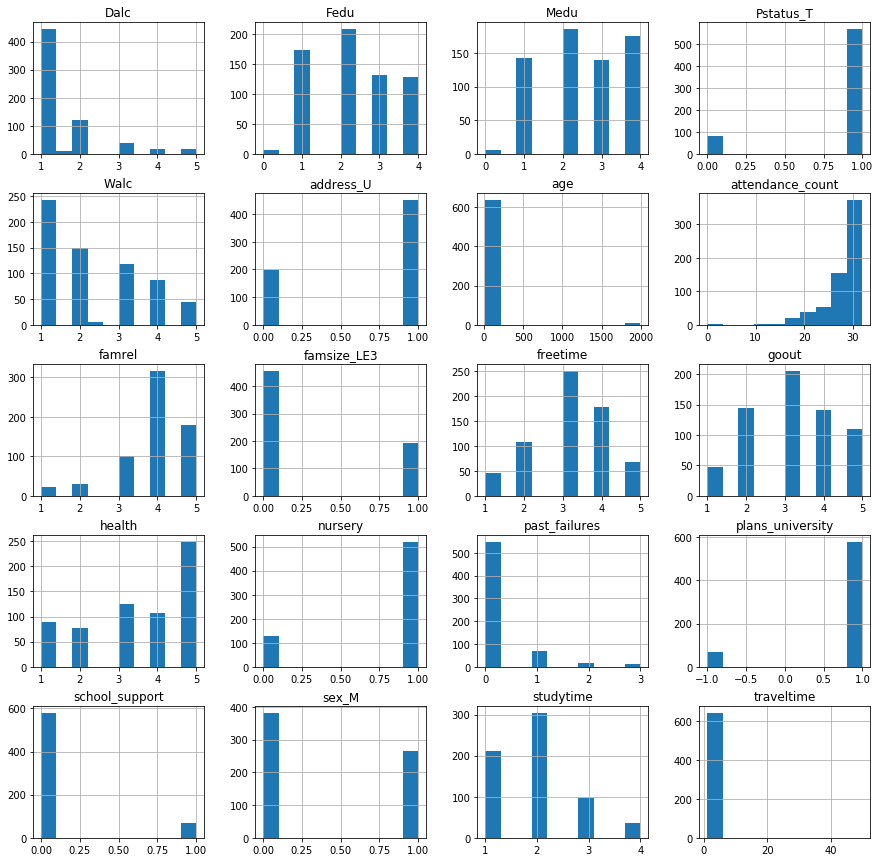

In [236]:
# Your code here
data.hist(figsize=(15, 15));

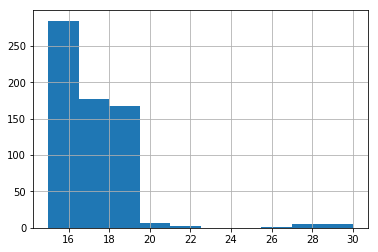

In [237]:
data['age'] = data['age'].apply(lambda x: 2017 - x if x > 1000 else x)
data['age'].hist();

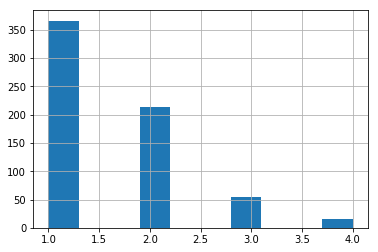

In [238]:
def travel_time(time):
    if time > 4:
        if time < 15:
            return 1
        elif time < 30:
            return 2
        elif time < 60:
            return 3
        else:
            return 4
    else:
        return time
    
data['traveltime'] = data['traveltime'].apply(travel_time)
data['traveltime'].hist();

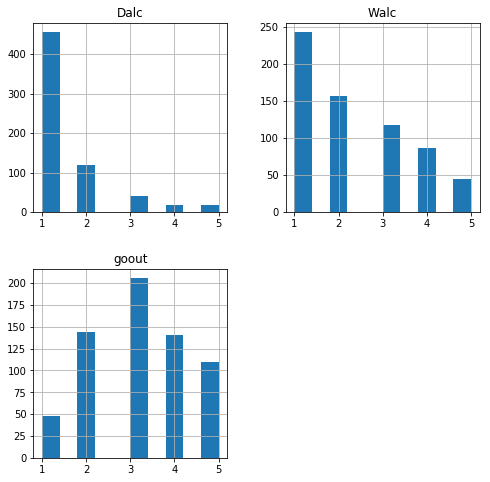

In [239]:
data['goout'] = data['goout'].apply(lambda x: np.round(x))
data['Dalc'] = data['Dalc'].apply(lambda x: np.round(x))
data['Walc'] = data['Walc'].apply(lambda x: np.round(x))
data[['goout', 'Dalc', 'Walc']].hist(figsize=(8, 8));

Другой простой способ найти выбросы &mdash; сделать предсказание на всех объектах и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

In [240]:
# Your code here
data.std()

age                 1.905920
Medu                1.134552
Fedu                1.099931
traveltime          0.748660
studytime           0.829510
famrel              0.955717
freetime            1.051093
goout               1.174866
Dalc                0.919763
Walc                1.280091
health              1.446259
sex_M               0.492187
address_U           0.460143
famsize_LE3         0.456771
Pstatus_T           0.328996
nursery             0.398212
school_support      0.306502
attendance_count    4.640759
plans_university    0.616962
past_failures       0.593235
dtype: float64

### Финальное предсказание

Проведите предсказание еще раз и сравните качество с исходным.

In [241]:
# Your code here
new_score = cross_val_score(linear, data, y=scores)
new_score

array([0.2528722 , 0.19534916, 0.17805524])

In [242]:
old_score

array([0.1538997 , 0.1400246 , 0.11817804])

In [246]:
(new_score - old_score).mean()

0.07139142133516851